In [2]:
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import math
import random
from tqdm import tqdm

In [3]:
save_IPR=np.load("ipr_list.npy")

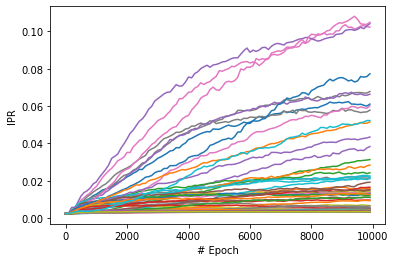

In [129]:
for i in range(100):
    plt.plot(np.arange(save_IPR.shape[0])*100,save_IPR[:,i])
plt.xlabel("# Epoch")
plt.ylabel("IPR")
plt.savefig("images/IPR_1000")

In [4]:
def IPR(w):
    return torch.sum(w**4)/(torch.sum(w**2)**2)

In [19]:
def IPR(w):
    return np.sum(w**4)/(np.sum(w**2)**2)

In [5]:
def visualize_fields(W, thresh=0):
    """
    W - K x (NxN) matrix
        K number of linear units
        NxN shape of the image
    """
    K,N_squared = W.shape
    N = int(np.sqrt(N_squared))
    for i in range(K):
        ipr = IPR(W[i])
        if ipr>thresh:
            print(ipr)
            plt.imshow(W[i].reshape((N,N)))
            plt.show()

In [6]:
class FCN(nn.Module):
    def __init__(self, d=28):
        super().__init__()
        #W
        self.lin1 = nn.Linear(28*28,100)
        #V fix it to 1/100
        self.lin2 = nn.Linear(1,100)
        self.lin2.weight.data=torch.ones(1,100)/100
        self.lin2.bias.data = torch.zeros(1)
        #self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x = self.lin1(x)
        x = F.sigmoid(x)
        x = torch.erf(x / torch.sqrt(torch.tensor(2.0)))
        x = self.lin2(x)
        return x

In [7]:
model = FCN()

In [8]:
model.load_state_dict(torch.load("checkpoint.pth"))

<All keys matched successfully>

In [9]:
print(model)

FCN(
  (lin1): Linear(in_features=784, out_features=100, bias=True)
  (lin2): Linear(in_features=1, out_features=100, bias=True)
)


In [10]:
W = model.lin1.weight.data

In [107]:
colors_list = [
    '#FF0000',  # Red
    '#800000',  # Maroon
    '#FFFF00',  # Yellow
    '#808000',  # Olive
    '#00FF00',  # Lime
    '#008000',  # Green
    '#00FFFF',  # Aqua
    '#008080',  # Teal
    '#0000FF',  # Blue
    '#000080',  # Navy
    '#FF00FF',  # Fuchsia
    '#800080',  # Purple
    '#CD5C5C',  # IndianRed
    '#F08080',  # LightCoral
    '#FA8072',  # Salmon
    '#E9967A',  # DarkSalmon
    '#FFA07A',  # LightSalmon
    '#DC143C',  # Crimson
    '#FF4500',  # OrangeRed
    '#FF8C00',  # DarkOrange
    '#FFD700',  # Gold
    '#B8860B',  # DarkGoldenRod
    '#32CD32',  # LimeGreen
    '#7CFC00',  # LawnGreen
    '#7FFF00',  # Chartreuse
    '#ADFF2F',  # GreenYellow
    '#2E8B57',  # SeaGreen
    '#3CB371',  # MediumSeaGreen
    '#98FB98',  # PaleGreen
    '#00FF7F'   # SpringGreen
]

tensor(0.0604)
tensor(0.0153)
tensor(0.0308)
tensor(0.0096)
tensor(0.0379)
tensor(0.1017)
tensor(0.0677)
tensor(0.0136)
tensor(0.0151)
tensor(0.0216)
tensor(0.0140)
tensor(0.0240)
tensor(0.0131)
tensor(0.0066)
tensor(0.0224)
tensor(0.1044)
tensor(0.0109)
tensor(0.0054)
tensor(0.0576)
tensor(0.0230)
tensor(0.0292)
tensor(0.0666)
tensor(0.0612)
tensor(0.0054)
tensor(0.0212)
tensor(0.0129)
tensor(0.0095)
tensor(0.0120)
tensor(0.0166)
tensor(0.0189)
tensor(0.0129)
tensor(0.1059)
tensor(0.0054)
tensor(0.0149)
tensor(0.0064)
tensor(0.0110)
tensor(0.0438)
tensor(0.0773)
tensor(0.0522)
tensor(0.0531)


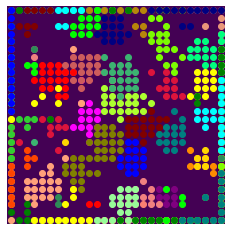

In [109]:
    K,N_squared = W.shape
    N = int(np.sqrt(N_squared))
    plt.imshow(np.zeros((28,28)))
    k=0
    for i in range(K):
        ipr = IPR(W[i])

        if ipr>0.005:
            print(ipr)
            mean = torch.mean(W[i])
            std = torch.std(W[i])
            x,y = np.where(W[i].reshape(28,28)<(mean-2*std))
            plt.scatter(x, y, c=colors_list[k%len(colors_list)])
            k+=1
plt.axis('off')
plt.savefig('allactiv.png')

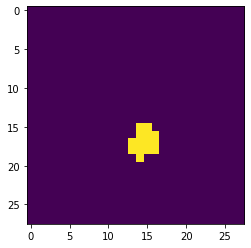

In [90]:
mean = torch.mean(W[1])
std = torch.std(W[1])
plt.imshow(W[1].reshape(28,28)<(mean-2.5*std))
#plt.axis('off')
#plt.savefig('images/activation6')

In [85]:
torch.mean(W[1])
torch.std(W[1])

tensor(0.0298)

In [1]:
%ls *.npy

 Volume in drive C is OSDisk
 Volume Serial Number is 7A59-4374

 Directory of C:\Users\VukadinoviM\Documents\UCLA\ML\Project

06/02/2023  01:19 PM       800,000,128 cum_mat.npy
05/30/2023  04:13 AM            40,128 ipr_list.npy
06/06/2023  01:12 PM           500,128 pos01.npy
06/06/2023  08:09 AM         4,000,128 pos3.npy
06/06/2023  01:13 PM           500,128 pos5.npy
06/06/2023  04:37 PM         2,000,128 tilepos01.npy
06/06/2023  04:53 PM         2,000,128 tilepos1.npy
06/06/2023  04:53 PM         2,000,128 tilepos10.npy
06/06/2023  04:53 PM         2,000,128 tilepos11.npy
06/06/2023  04:53 PM         2,000,128 tilepos12.npy
06/06/2023  04:53 PM         2,000,128 tilepos13.npy
06/06/2023  04:53 PM         2,000,128 tilepos14.npy
06/06/2023  04:53 PM         2,000,128 tilepos2.npy
06/06/2023  04:53 PM         2,000,128 tilepos3.npy
06/06/2023  04:53 PM         2,000,128 tilepos4.npy
06/06/2023  04:53 PM         2,000,128 tilepos5.npy
06/06/2023  04:53 PM         2,000,128 tilepos6

In [11]:
np_weights = model.lin1.weight.detach().numpy()

In [12]:
np_weights

array([[-0.04222409,  0.00509017, -0.01544942, ...,  0.01219932,
        -0.00272802,  0.01141982],
       [-0.04493259, -0.00038604, -0.01857152, ..., -0.02680534,
         0.00294432, -0.02927529],
       [ 0.00822203,  0.01010022, -0.00177838, ..., -0.01526496,
         0.02365531,  0.0191394 ],
       ...,
       [-0.03614183, -0.00474263, -0.01655122, ..., -0.01776239,
         0.04766582, -0.00935264],
       [ 0.05141965, -0.0333278 , -0.08961436, ..., -0.02200577,
        -0.02304371,  0.16273993],
       [-0.03124332, -0.01138478, -0.02131136, ...,  0.02529461,
        -0.00575633, -0.01519837]], dtype=float32)

In [1]:
import umap

reducer = umap.UMAP()

C:\tools\miniconda3\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\tools\miniconda3\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\tools\miniconda3\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was

In [13]:
embedding = reducer.fit_transform(np_weights)
embedding.shape

(100, 2)

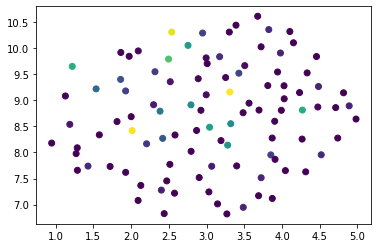

In [24]:
plt.scatter(embedding[:,0], embedding[:,1], c=IPR_RES)

In [22]:
IPR_RES = [IPR(np_weights[i]) for i in range(np_weights.shape[0])]

In [23]:
IPR_RES

[0.060429613946282906,
 0.015287619091122981,
 0.030832228342656177,
 0.009612305585702528,
 0.037874663164075464,
 0.003390844120404417,
 0.10170022167608127,
 0.06767130161645404,
 0.01363597539877407,
 0.0033834852481907365,
 0.0035771740977424936,
 0.003795640071908949,
 0.003285745109740393,
 0.0033629007090743533,
 0.0036979233459692273,
 0.015086851025671767,
 0.004841598934022503,
 0.021647597388362718,
 0.014025594310005796,
 0.003427310840237686,
 0.003395805137451309,
 0.004368406024726201,
 0.023955860298548744,
 0.003752078918132292,
 0.003835186839154396,
 0.0034114667388958878,
 0.01313119565977485,
 0.003506182968837483,
 0.006601989839379404,
 0.022431979097743932,
 0.0036424083392025295,
 0.003314914679467655,
 0.0035358813462727044,
 0.00330256130601919,
 0.10443550763648111,
 0.010898150717800526,
 0.005435572618585872,
 0.057572433182705864,
 0.004236423456520899,
 0.02303629605838438,
 0.0035161788509815535,
 0.029158202680663478,
 0.003338449746600826,
 0.0036902

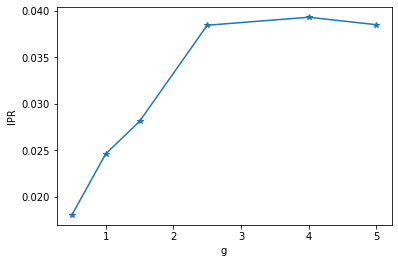

In [10]:
import matplotlib.pyplot as plt
a=[0.5, 1, 1.5, 2.5, 4, 5]
b=[0.018078467015107572,0.02463961401258609,0.0281264432299686,0.038447479208649146,0.0393087865346881,0.03850791056257609]
plt.plot(a, b,'*-')
plt.xlabel("g")
plt.ylabel("IPR")
plt.savefig("gvsIPR", dpi=400)